In [1]:
# Identify doublons in the data_set
# doublon = colonnes CO, AX effectif, Ligand effectif, Precuseur, Add Effectif, Solvent, Time, Temp, Product, identiques

In [2]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from rdkit import Chem
import matplotlib.pyplot as plt
import dft_descriptors.prepocessing as pp

In [3]:
col_feat = ['Reactant Smile (C-O)', 'A-X effectif', 'Solvent',
       'Time', 'Temperature', 'Precurseur Nickel', 
       'Base/additif après correction effective', 'Ligand effectif', 'Product']
col_info = ['Index', 'A-X', 'Base/additifs', 'Ligand', 'GC/NMR Yield', 'Isolated Yield', 'A-X type', 'Mechanism',
       'Unnamed: 17', 'DOI', 'type of data (Optimisation or scope)',
       'Notes : qu\'est ce qui ne rentres pas dans le tableau',
       'Notes bis : modifications', 'Unnamed: 22', 'Unnamed: 23']

def remove_nan(L):
    cleanedList = [x for x in L if str(x) != 'nan']
    return cleanedList

def traitement_doublons(df):
    df_feat = df.drop(columns=col_info)
    dup_feat = df[df_feat.duplicated(keep = 'first')]
    Idx = []
    Y = []
    Infos = []
    DOIS = []
    df2 = df
    for i in range(len(dup_feat)):
        df3 = df2
        for j in col_feat:
            if str(dup_feat.iloc[i][j]) == 'nan':
                df3 = df3[df3[j].isna()]
            else:
                df3 = df3[df3[j] == dup_feat.iloc[i][j]]
        Idx.append(df3["Index"].to_list())
        Y.append((df3["GC/NMR Yield"].to_list(), df3["Isolated Yield"].to_list()))
        Infos.append(df3["type of data (Optimisation or scope)"].to_list())
        DOIS.append(df3["DOI"])
        
    multons = []
    for indexes in np.unique(Idx):
        multons.append(len(list(indexes)))
        
    x = [i+1 for i in range(max(multons))]
    num = [len(df2)-sum(multons)]
    for i in range(1, max(multons)):
        num.append(multons.count(i+1)) 

    plt.bar(x, num)
    plt.title("Bar plot of the distribution of multiples samples in our reaction space")
    plt.show()
    
    n_opt = 0
    n_sco = 0
    for indexes in np.unique(Idx):
        for data in Infos[Idx.index(indexes)]:
            if data == 'Optimisation':
                n_opt +=1
            elif str(data) == 'Scope':
                n_sco +=1 
            elif data == 'Scope ':
                n_sco +=1 
    print("\n")
    print("Parmi les reactions doublons la répartition scope/optimisation est la suivante :")
    print("nombre d'optimisation = ", n_opt)
    print("nombre de scope       = ", n_sco) 
    print("\n")
    


    i = 0
    var_gc  = []
    var_iso = []
    for indexes in np.unique(Idx):
        gc_nmr = Y[Idx.index(indexes)][0]
        isolat = Y[Idx.index(indexes)][1]
        gc_nmr = remove_nan(gc_nmr)
        isolat = remove_nan(isolat)
        
        if len(gc_nmr) > 0 and str(gc_nmr[0]) != 'nan':
            if 'nd' in gc_nmr:
                gc_nmr.remove('nd')
            if '>95' in gc_nmr:
                gc_nmr.remove('>95')
                gc_nmr.append('100')

        if len(gc_nmr) > 0:
            var_gc.append(np.std([eval(i) for i in gc_nmr]))

        if len(isolat) > 0 and str(isolat[0]) != 'nan':
            if 'nd' in isolat:
                isolat.remove('nd')
            if '>95' in isolat:
                isolat.remove('>95')
                isolat.append('100')

        if len(isolat) > 0:
            var_iso.append(np.std([eval(i) for i in isolat]))

    print("for the isolated yields in the doublons there are ", var_iso.count(0), "identic yields")
    print("for the GC/NMR yields in the doublons there are ", var_gc.count(0), "identic yields")

    n_bins = 10
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    axs[0].hist(var_iso, bins=n_bins)
    axs[1].hist(var_gc, bins=n_bins)
    axs[0].title.set_text("histo for var isolated yields")
    axs[1].title.set_text("histo for var GC/NMR yields")
    plt.show()
    
    sames = []
    for indexes in np.unique(Idx):
        dois = list(DOIS[Idx.index(indexes)])
        doi_0 = dois[0]
        same = True
        for doi in dois:
            if doi != doi_0:
                same = False
        sames.append(same)
    
    print("In the doublons ", sames.count(True), "come from the same DOI")
    print("In the doublons ", sames.count(False), "come have at least two members from different DOI")
    return Idx       

In [4]:
df = pd.read_csv('../data_csv/Data_test10282021.csv', sep = ',')
df_wo_rev = df[df["Mechanism"] != 'Review']

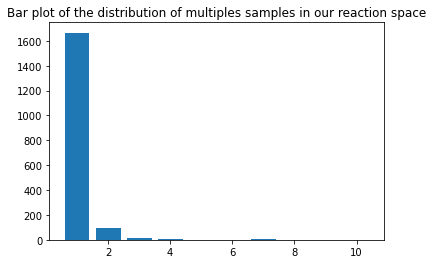



Parmi les reactions doublons la répartition scope/optimisation est la suivante :
nombre d'optimisation =  243
nombre de scope       =  82


for the isolated yields in the doublons there are  69 identic yields
for the GC/NMR yields in the doublons there are  24 identic yields


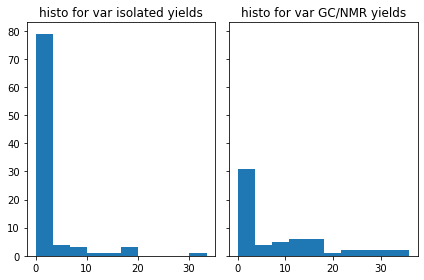

In the doublons  106 come from the same DOI
In the doublons  23 come have at least two members from different DOI


In [41]:
Idx = traitement_doublons(df)

In [42]:
Idx

[[8.0, 11.0],
 [66.0, 73.0],
 [104.0, 105.0],
 [114.0, 119.0],
 [181.0, 188.0, 202.0, 270.0, 283.0, 305.0],
 [181.0, 188.0, 202.0, 270.0, 283.0, 305.0],
 [208.0, 245.0],
 [255.0, 256.0, 257.0],
 [255.0, 256.0, 257.0],
 [250.0, 258.0, 266.0],
 [259.0, 260.0, 261.0],
 [259.0, 260.0, 261.0],
 [254.0, 262.0],
 [263.0, 264.0, 265.0],
 [263.0, 264.0, 265.0],
 [250.0, 258.0, 266.0],
 [267.0, 268.0, 269.0],
 [267.0, 268.0, 269.0],
 [181.0, 188.0, 202.0, 270.0, 283.0, 305.0],
 [182.0, 271.0],
 [183.0, 272.0],
 [184.0, 277.0],
 [185.0, 280.0],
 [186.0, 281.0],
 [187.0, 282.0],
 [181.0, 188.0, 202.0, 270.0, 283.0, 305.0],
 [189.0, 284.0],
 [191.0, 286.0],
 [192.0, 290.0],
 [193.0, 291.0],
 [194.0, 292.0],
 [195.0, 293.0],
 [196.0, 294.0],
 [197.0, 300.0],
 [199.0, 302.0],
 [200.0, 303.0],
 [201.0, 304.0],
 [181.0, 188.0, 202.0, 270.0, 283.0, 305.0],
 [203.0, 306.0],
 [328.0, 345.0, 346.0],
 [328.0, 345.0, 346.0],
 [390.0, 391.0, 392.0, 393.0],
 [390.0, 391.0, 392.0, 393.0],
 [390.0, 391.0, 392.0,

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


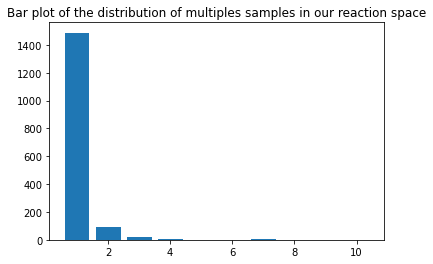



Parmi les reactions doublons la répartition scope/optimisation est la suivante :
nombre d'optimisation =  243
nombre de scope       =  69


for the isolated yields in the doublons there are  64 identic yields
for the GC/NMR yields in the doublons there are  23 identic yields


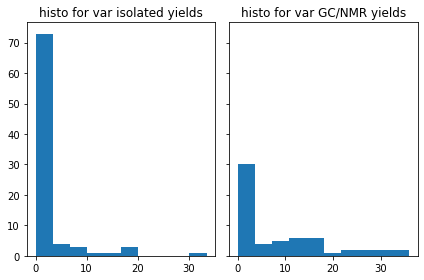

In the doublons  106 come from the same DOI
In the doublons  17 come have at least two members from different DOI


[[8.0, 11.0],
 [66.0, 73.0],
 [104.0, 105.0],
 [114.0, 119.0],
 [181.0, 188.0, 202.0, 270.0, 283.0, 305.0],
 [181.0, 188.0, 202.0, 270.0, 283.0, 305.0],
 [208.0, 245.0],
 [255.0, 256.0, 257.0],
 [255.0, 256.0, 257.0],
 [250.0, 258.0, 266.0],
 [259.0, 260.0, 261.0],
 [259.0, 260.0, 261.0],
 [254.0, 262.0],
 [263.0, 264.0, 265.0],
 [263.0, 264.0, 265.0],
 [250.0, 258.0, 266.0],
 [267.0, 268.0, 269.0],
 [267.0, 268.0, 269.0],
 [181.0, 188.0, 202.0, 270.0, 283.0, 305.0],
 [182.0, 271.0],
 [183.0, 272.0],
 [184.0, 277.0],
 [185.0, 280.0],
 [186.0, 281.0],
 [187.0, 282.0],
 [181.0, 188.0, 202.0, 270.0, 283.0, 305.0],
 [189.0, 284.0],
 [191.0, 286.0],
 [192.0, 290.0],
 [193.0, 291.0],
 [194.0, 292.0],
 [195.0, 293.0],
 [196.0, 294.0],
 [197.0, 300.0],
 [199.0, 302.0],
 [200.0, 303.0],
 [201.0, 304.0],
 [181.0, 188.0, 202.0, 270.0, 283.0, 305.0],
 [203.0, 306.0],
 [328.0, 345.0, 346.0],
 [328.0, 345.0, 346.0],
 [390.0, 391.0, 392.0, 393.0],
 [390.0, 391.0, 392.0, 393.0],
 [390.0, 391.0, 392.0,

In [50]:
traitement_doublons(df_wo_rev)

In [36]:
Idx

NameError: name 'Idx' is not defined

(array([4., 6., 4., 3., 6., 2., 3., 5., 5., 0., 0., 2., 3., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  6.  ,  12.48,  18.96,  25.44,  31.92,  38.4 ,  44.88,  51.36,
         57.84,  64.32,  70.8 ,  77.28,  83.76,  90.24,  96.72, 103.2 ,
        109.68, 116.16, 122.64, 129.12, 135.6 , 142.08, 148.56, 155.04,
        161.52, 168.  ]),
 <BarContainer object of 25 artists>)

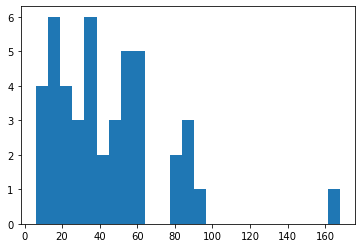

In [49]:
number =[]
for doi in np.unique(df["DOI"]):
    number.append(df["DOI"].to_list().count(doi))
    
plt.hist(number, bins = 25)

In [51]:
sco = 0
opt = 0
for t in df["type of data (Optimisation or scope)"]:
    if t == 'Scope':
        sco += 1
    else:
        opt += 1
print(sco, opt)

946 1044
